In [2]:
pip install pandas matplotlib

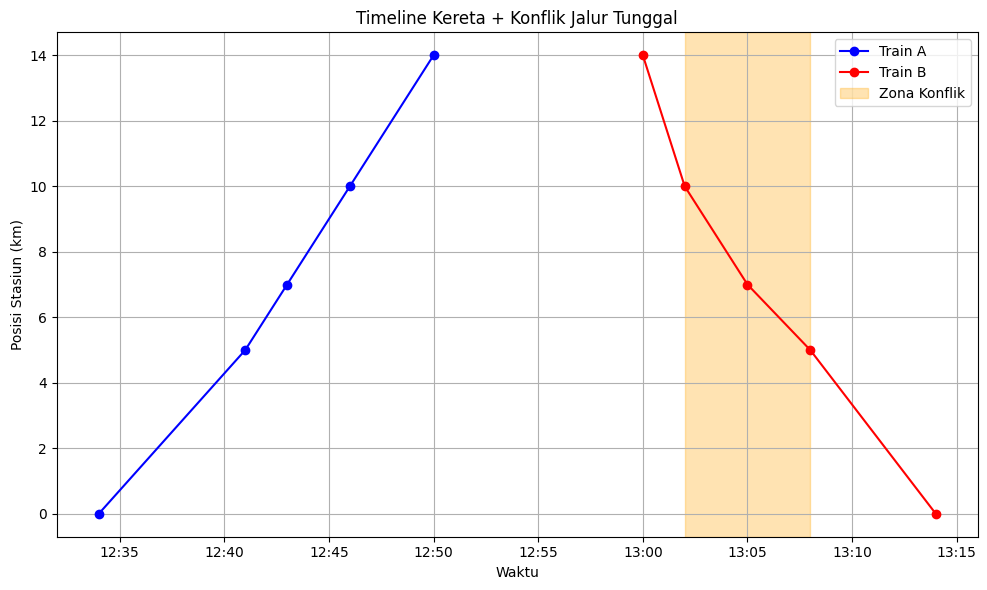

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Jadwal dan posisi tetap
data = [
    ['Train A', 'Fordbridge', '12:34'],
    ['Train A', 'Nutcombe', '12:41'],
    ['Train A', 'Cablethorpe', '12:43'],
    ['Train A', 'Moulton Junction', '12:46'],
    ['Train A', 'Snettleford', '12:50'],

    ['Train B', 'Snettleford', '13:00'],
    ['Train B', 'Moulton Junction', '13:02'],
    ['Train B', 'Cablethorpe', '13:05'],
    ['Train B', 'Nutcombe', '13:08'],
    ['Train B', 'Fordbridge', '13:14'],
]

station_km = {
    'Fordbridge': 0,
    'Nutcombe': 5,
    'Cablethorpe': 7,
    'Moulton Junction': 10,
    'Snettleford': 14
}

df = pd.DataFrame(data, columns=['Train', 'Station', 'Time'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Station_km'] = df['Station'].map(station_km)

# Pisahkan Train A dan B
a = df[df['Train'] == 'Train A']
b = df[df['Train'] == 'Train B']

# PLOT
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(a['Time'], a['Station_km'], label='Train A', color='blue', marker='o')
ax.plot(b['Time'], b['Station_km'], label='Train B', color='red', marker='o')

# Highlight overlap: antara 13:02 s.d. 13:08 pada segmen Cablethorpe ↔ Moulton
start_conflict = datetime.strptime('13:02', '%H:%M')
end_conflict = datetime.strptime('13:08', '%H:%M')
ax.axvspan(start_conflict, end_conflict, color='orange', alpha=0.3, label='Zona Konflik')

# Layout
ax.set_title('Timeline Kereta + Konflik Jalur Tunggal')
ax.set_xlabel('Waktu')
ax.set_ylabel('Posisi Stasiun (km)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


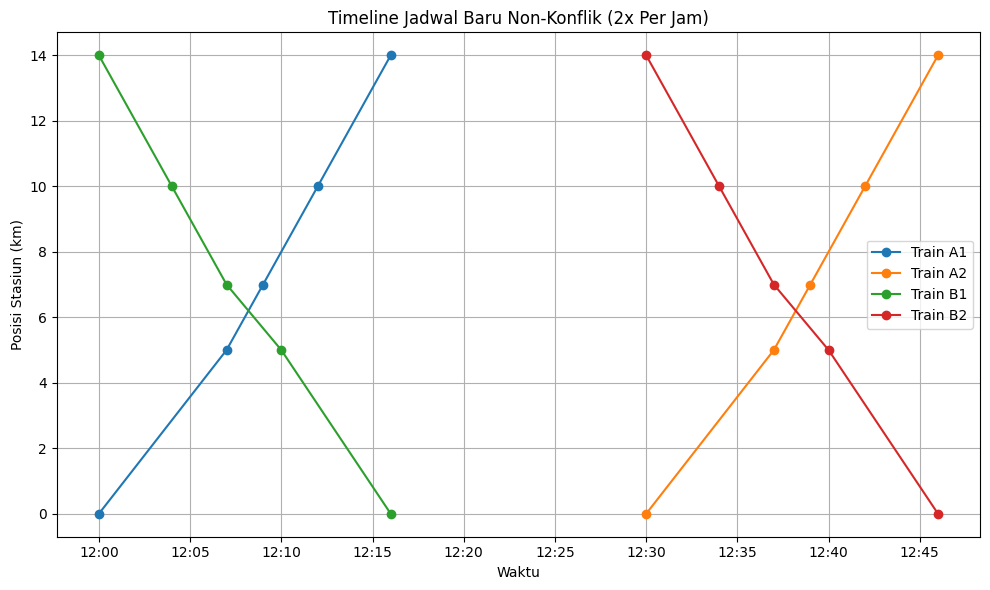

In [ ]:
# Data jadwal baru non-konflik
data = [
    # Train A1
    ['Train A1', 'Fordbridge', '12:00'],
    ['Train A1', 'Nutcombe', '12:07'],
    ['Train A1', 'Cablethorpe', '12:09'],
    ['Train A1', 'Moulton Junction', '12:12'],
    ['Train A1', 'Snettleford', '12:16'],

    # Train B1
    ['Train B1', 'Snettleford', '12:00'],
    ['Train B1', 'Moulton Junction', '12:04'],
    ['Train B1', 'Cablethorpe', '12:07'],
    ['Train B1', 'Nutcombe', '12:10'],
    ['Train B1', 'Fordbridge', '12:16'],

    # Train A2
    ['Train A2', 'Fordbridge', '12:30'],
    ['Train A2', 'Nutcombe', '12:37'],
    ['Train A2', 'Cablethorpe', '12:39'],
    ['Train A2', 'Moulton Junction', '12:42'],
    ['Train A2', 'Snettleford', '12:46'],

    # Train B2
    ['Train B2', 'Snettleford', '12:30'],
    ['Train B2', 'Moulton Junction', '12:34'],
    ['Train B2', 'Cablethorpe', '12:37'],
    ['Train B2', 'Nutcombe', '12:40'],
    ['Train B2', 'Fordbridge', '12:46'],
]

# Posisi stasiun (km)
station_km = {
    'Fordbridge': 0,
    'Nutcombe': 5,
    'Cablethorpe': 7,
    'Moulton Junction': 10,
    'Snettleford': 14
}

# Buat DataFrame
df = pd.DataFrame(data, columns=['Train', 'Station', 'Time'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Station_km'] = df['Station'].map(station_km)

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))

for train_name, group in df.groupby('Train'):
    ax.plot(group['Time'], group['Station_km'], marker='o', label=train_name)

# Format sumbu
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel("Waktu")
ax.set_ylabel("Posisi Stasiun (km)")
ax.set_title("Timeline Jadwal Baru Non-Konflik (2x Per Jam)")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()
